# Drought Gradient

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import xarray as xr

import matplotlib.dates as mdates

from tqdm.autonotebook import tqdm

import sys
sys.path.append('../../')
import ndrought.wrangle as wrangle
import ndrought.compare as compare
import ndrought.plotting as ndplot

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/tmp/ipykernel_1837497/998061375.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dm_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures'
pdsi = xr.open_dataset(f'{dm_path}/pdsi/WA/pdsi.nc')['pdsi']
pdsi

<xarray.DataArray 'pdsi' (day: 3066, lat: 84, lon: 188)>
[48418272 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 48.98 48.94 48.9 48.86 ... 45.65 45.61 45.57 45.53
  * lon      (lon) float64 -124.7 -124.7 -124.6 -124.6 ... -117.0 -117.0 -116.9
  * day      (day) datetime64[ns] 1980-01-05 1980-01-10 ... 2021-12-31
Attributes:
    units:              
    description:        Palmer Drought Severity Index
    long_name:          pdsi
    standard_name:      pdsi
    dimensions:         lon lat time
    coordinate_system:  WGS84,EPSG:4326
    Clipping:           original data was clipped to Washington using http://...
    grid_mapping:       crs

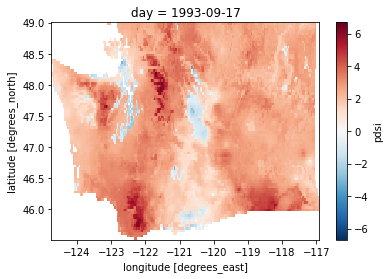

In [3]:
fig, ax = plt.subplots()

pdsi.isel(day=1000).plot(ax=ax)

In [4]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [5]:
x = pdsi.lon.values
y = pdsi.lat.values

xs, ys = np.meshgrid(x, y)

/tmp/ipykernel_1837497/882334999.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


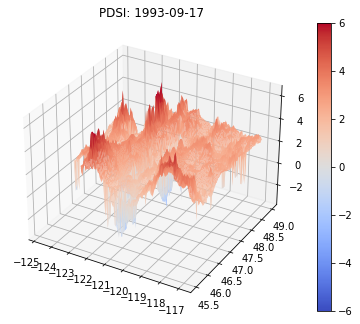

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
i = 1000
plotted = ax.plot_surface(xs, ys, pdsi.values[i,:,:], rstride=1, cstride=1, cmap='coolwarm', vmin=-6, vmax=6)
ax.set_title(f'PDSI: {str(pdsi.day.values[i])[:10]}')
fig.colorbar(plotted, ax=ax)

In [7]:
np.gradient?

Signature: np.gradient(f, *varargs, axis=None, edge_order=1)
Docstring:
Return the gradient of an N-dimensional array.

The gradient is computed using second order accurate central differences
in the interior points and either first or second order accurate one-sides
(forward or backwards) differences at the boundaries.
The returned gradient hence has the same shape as the input array.

Parameters
----------
f : array_like
    An N-dimensional array containing samples of a scalar function.
varargs : list of scalar or array, optional
    Spacing between f values. Default unitary spacing for all dimensions.
    Spacing can be specified using:

    1. single scalar to specify a sample distance for all dimensions.
    2. N scalars to specify a constant sample distance for each dimension.
       i.e. `dx`, `dy`, `dz`, ...
    3. N arrays to specify the coordinates of the values along each
       dimension of F. The length of the array must match the size of
       the corresponding dimensio

In [8]:
dt, dy, dx = np.gradient(pdsi.values[::100, :, :])

https://stackoverflow.com/questions/51254419/how-to-create-a-3d-heatmap-from-a-discrete-data-set-in-python

https://stackoverflow.com/questions/7855229/how-to-make-a-4d-plot-using-python-with-matplotlib

In [9]:
xs, ys = np.meshgrid(pdsi.lon.values, pdsi.lat.values)

In [10]:
dt.shape

(31, 84, 188)

In [11]:
dt_0 = dt[0,:,:]
dt_0.shape

(84, 188)

In [12]:
mask = np.ma.make_mask(np.isnan(dt_0))
masked_data = np.ma.masked_array(np.ones((84, 188)), mask)

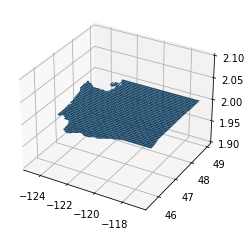

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xs, ys, 2*masked_data)
#ax.plot_surface?

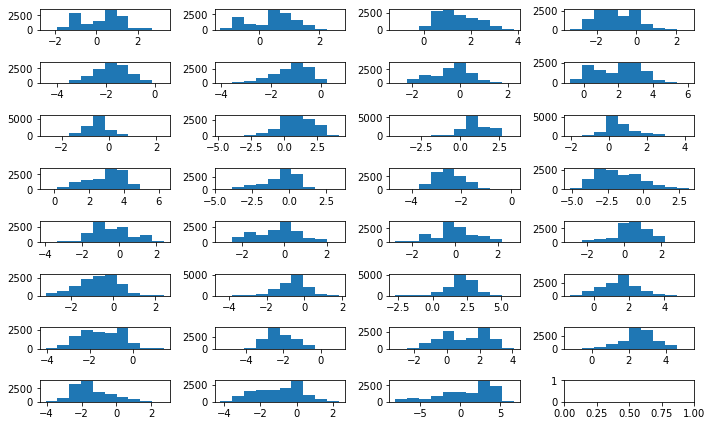

In [17]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
fig, axs = plt.subplots(8, 4, figsize=(10,6))
axs_list = axs.ravel()

for i in np.arange(31):
    dt_i = dt[i, :, :]
    mask = np.ma.make_mask(np.isnan(dt_i))
    i_masked = i*np.ma.masked_array(np.ones((84, 188)), mask)

    #ax.plot_surface(xs, ys, i_masked, facecolors=cm.coolwarm(dt_i), alpha=0.5)
    axs_list[i].hist(dt_i.ravel())

plt.tight_layout()